<a href="https://colab.research.google.com/github/ajk22/ClassWork1/blob/master/Kinser_DS200_Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## DS 200 Final Project
## Alex Kinser
### **Dataset Used:**
https://www.kaggle.com/danield2255/data-on-songs-from-billboard-19992019

**Dataset Description**

This dataset "artistDf.csv" was taken from Kaggle, it is a dataset containing all of the artists that have made appearances on the billboard top 100 list in the past 20 years from the years 1999 to 2019. This dataset also only contains artists who have released atleast 3 albums and have released their first album no later than 2012.


In [ ]:
from datascience import *
import matplotlib
matplotlib.use('Agg', warn=False)
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
import numpy as np

/usr/local/lib/python3.7/dist-packages/datascience/tables.py:17: MatplotlibDeprecationWarning: The 'warn' parameter of use() is deprecated since Matplotlib 3.1 and will be removed in 3.3.  If any parameter follows 'warn', they should be pass as keyword, not positionally.
  matplotlib.use('agg', warn=False)
/usr/local/lib/python3.7/dist-packages/datascience/util.py:10: MatplotlibDeprecationWarning: The 'warn' parameter of use() is deprecated since Matplotlib 3.1 and will be removed in 3.3.  If any parameter follows 'warn', they should be pass as keyword, not positionally.
  matplotlib.use('agg', warn=False)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: The 'warn' parameter of use() is deprecated since Matplotlib 3.1 and will be removed in 3.3.  If any parameter follows 'warn', they should be pass as keyword, not positionally.
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving artistDf.csv to artistDf (1).csv


## **Questions**

1. What percentage of billboard artists in the past 20 years belong to a musical group?

2. What is the average number of albums released by billboard artists in the past 20 years?

In [ ]:
#Question 1

In [ ]:
artists = Table.read_table("/content/artistDf.csv")
artists.show(10)

X,Artist,Followers,Genres,NumAlbums,YearFirstAlbum,Gender,Group.Solo
0,Ed Sheeran,52698756,"pop,uk pop",8,2011,M,Solo
1,Justin Bieber,30711450,"canadian pop,dance pop,pop,post-teen pop",10,2009,M,Solo
2,Jonas Brothers,3069527,"boy band,dance pop,pop,post-teen pop",10,2006,M,Group
3,Drake,41420478,"canadian hip hop,canadian pop,hip hop,pop rap,rap,toront ...",11,2010,M,Solo
4,Chris Brown,9676862,"dance pop,pop,pop rap,r&b,rap",6,2005,M,Solo
5,Taylor Swift,23709128,"dance pop,pop,post-teen pop",10,2006,F,Solo
6,Blake Shelton,4511508,"contemporary country,country,country road",12,2001,M,Solo
7,Nicki Minaj,16331335,"dance pop,hip pop,pop,pop rap,post-teen pop,rap",10,2010,F,Solo
8,Panic! At The Disco,8129075,"baroque pop,emo,modern rock,pop punk",8,2005,M,Group
9,Lee Brice,1094596,"contemporary country,country,country road,modern country ...",4,2010,M,Solo


In [ ]:
group_artists = artists.where("Group.Solo", "Group")
group_artists = group_artists.column("Group.Solo")
group_artists_array = make_array(group_artists)
group_count = group_artists_array.size
group_count

332

In [ ]:
all_artist_count = artists.column("Group.Solo")
all_artist_count = make_array(all_artist_count)
all_artist_count = all_artist_count.size
all_artist_count

1035

In [ ]:
group_percentage = group_count / all_artist_count * 100
group_percentage

32.07729468599034

## **Answer:**

32.08% of artists belong to a group out of all the artists that have appeared on the billboard top 100 chart in the past 20 years.

In [ ]:
#Question 2

In [ ]:
album_count = artists.column("NumAlbums")
avg_album = np.mean(album_count)
avg_album

11.329468599033817

## **Answer:** 

11.33 is the average number of albums released by artists that have appeared on the billboard top 100 chart in the past 20 years

##**Visualization**
Number of albums released by artists who have appeared on the billboard top 100 chart in the past 20 years

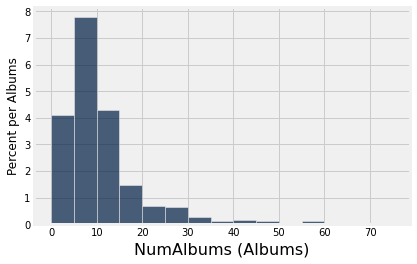

In [ ]:
artists.hist("NumAlbums", bins=np.arange(0,80,5), unit="Albums")

## **Hypothesis Test**


In [ ]:
# Null Hypothesis : The percentage of female to male artists on this list is 50/50
# Alternative Hypothesis : The percentage of female to male artists on this list is not 50/50

In [ ]:
male_artists = artists.where("Gender", "M")
male_artists = male_artists.column("Artist")
count_male = male_artists.size
count_male

716

In [ ]:
male_proportion = count_male / all_artist_count
male_proportion

0.6917874396135266

In [ ]:
female_artists = artists.where("Gender", "F")
female_artists = female_artists.column("Artist")
count_female = female_artists.size
count_female

235

In [ ]:
female_proportion = count_female / all_artist_count
female_proportion

0.22705314009661837

In [ ]:
model_proportions = [0.50, 0.50]

In [ ]:
def distance_from_50(p):
    return abs(100*p - 50)

In [ ]:
def one_simulated_distance():
    proportion = sample_proportions(all_artist_count, model_proportions).item(0)
    return distance_from_50(proportion)

In [ ]:
distances = make_array()

repetitions = 10000
for i in np.arange(repetitions):
    distances = np.append(distances, one_simulated_distance())

In [ ]:
distances

array([1.49758454, 1.5942029 , 2.36714976, ..., 3.81642512, 0.43478261,
       1.78743961])

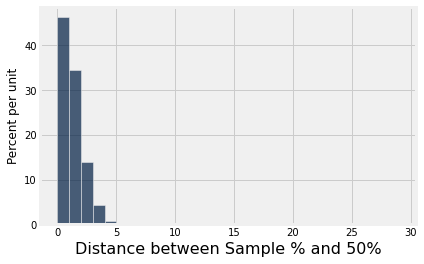

In [ ]:
Table().with_column(
    'Distance between Sample % and 50%', distances
).hist(bins=np.arange(0,30,1))

In [ ]:
observed_statistic_female = distance_from_50(female_proportion)
observed_statistic_female

27.294685990338163

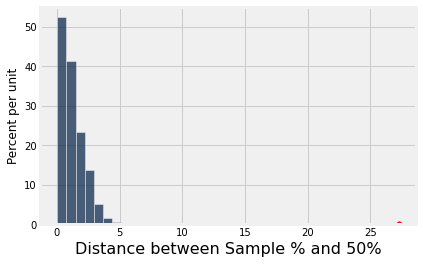

In [ ]:
Table().with_column(
    'Distance between Sample % and 50%', distances
).hist()
plots.scatter(observed_statistic_female, 0, color='red', s=30);

## **Conclusion** :


The p value is 0 for the observed statistic of 0.22705314009661837, we can most certainly deny the null hypothesis and accept the alternative.

### Prediction Method - Correlation

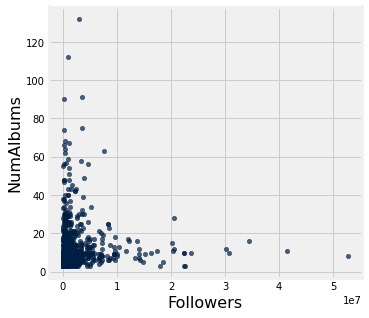

In [ ]:
artists.scatter("Followers", "NumAlbums")

In [ ]:
def standard_units(any_numbers):
    "Convert any array of numbers to standard units."
    return (any_numbers - np.mean(any_numbers))/np.std(any_numbers)

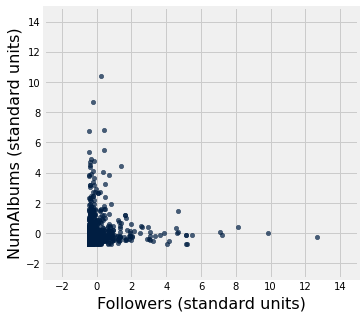

In [ ]:
Table().with_columns(
    'Followers (standard units)',  standard_units(artists.column('Followers')), 
    'NumAlbums (standard units)', standard_units(artists.column('NumAlbums'))
).scatter(0, 1)
plots.xlim(-3, 15)
plots.ylim(-3, 15);

In [ ]:
followers_albums_su = artists.with_columns(
        'followers (standard units)', standard_units(artists.column('Followers')),
        'albums (standard units)', standard_units(artists.column('NumAlbums'))
    )
followers_albums_su

X,Artist,Followers,Genres,NumAlbums,YearFirstAlbum,Gender,Group.Solo,followers (standard units),albums (standard units)
0,Ed Sheeran,52698756,"pop,uk pop",8,2011,M,Solo,12.6886,-0.286185
1,Justin Bieber,30711450,"canadian pop,dance pop,pop,post-teen pop",10,2009,M,Solo,7.20323,-0.114275
2,Jonas Brothers,3069527,"boy band,dance pop,pop,post-teen pop",10,2006,M,Group,0.307092,-0.114275
3,Drake,41420478,"canadian hip hop,canadian pop,hip hop,pop rap,rap,toront ...",11,2010,M,Solo,9.87493,-0.0283195
4,Chris Brown,9676862,"dance pop,pop,pop rap,r&b,rap",6,2005,M,Solo,1.9555,-0.458095
5,Taylor Swift,23709128,"dance pop,pop,post-teen pop",10,2006,F,Solo,5.45628,-0.114275
6,Blake Shelton,4511508,"contemporary country,country,country road",12,2001,M,Solo,0.666839,0.0576356
7,Nicki Minaj,16331335,"dance pop,hip pop,pop,pop rap,post-teen pop,rap",10,2010,F,Solo,3.61566,-0.114275
8,Panic! At The Disco,8129075,"baroque pop,emo,modern rock,pop punk",8,2005,M,Group,1.56935,-0.286185
9,Lee Brice,1094596,"contemporary country,country,country road,modern country ...",4,2010,M,Solo,-0.185616,-0.630005


In [ ]:
su_product = followers_albums_su.with_column('product of standard units', followers_albums_su.column(8) * followers_albums_su.column(9))
su_product

X,Artist,Followers,Genres,NumAlbums,YearFirstAlbum,Gender,Group.Solo,followers (standard units),albums (standard units),product of standard units
0,Ed Sheeran,52698756,"pop,uk pop",8,2011,M,Solo,12.6886,-0.286185,-3.6313
1,Justin Bieber,30711450,"canadian pop,dance pop,pop,post-teen pop",10,2009,M,Solo,7.20323,-0.114275,-0.823146
2,Jonas Brothers,3069527,"boy band,dance pop,pop,post-teen pop",10,2006,M,Group,0.307092,-0.114275,-0.0350929
3,Drake,41420478,"canadian hip hop,canadian pop,hip hop,pop rap,rap,toront ...",11,2010,M,Solo,9.87493,-0.0283195,-0.279653
4,Chris Brown,9676862,"dance pop,pop,pop rap,r&b,rap",6,2005,M,Solo,1.9555,-0.458095,-0.895804
5,Taylor Swift,23709128,"dance pop,pop,post-teen pop",10,2006,F,Solo,5.45628,-0.114275,-0.623515
6,Blake Shelton,4511508,"contemporary country,country,country road",12,2001,M,Solo,0.666839,0.0576356,0.0384337
7,Nicki Minaj,16331335,"dance pop,hip pop,pop,pop rap,post-teen pop,rap",10,2010,F,Solo,3.61566,-0.114275,-0.413179
8,Panic! At The Disco,8129075,"baroque pop,emo,modern rock,pop punk",8,2005,M,Group,1.56935,-0.286185,-0.449125
9,Lee Brice,1094596,"contemporary country,country,country road,modern country ...",4,2010,M,Solo,-0.185616,-0.630005,0.116939


In [ ]:
r = np.mean(su_product.column(10))
r

0.035728159580289

## **Correlation Conclusion**

r = .04

This value of r indicates that there is no correlation between followers and number of albums that an artist or group has put out, this is because the value of r is so close to 0